# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на тарифы «Смарт» или «Ультра». Нужно построить модель для задачи классификации, которая выберет подходящий тариф.

Постройте модель с максимально большим значением *accuracy* (довести долю правильных ответов по крайней мере до 0.75).

## Общая информация о файле

In [1]:
# импортируем библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# откроем и посмотрим файл с данными
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv('https://datasets/users_behavior.csv')

df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


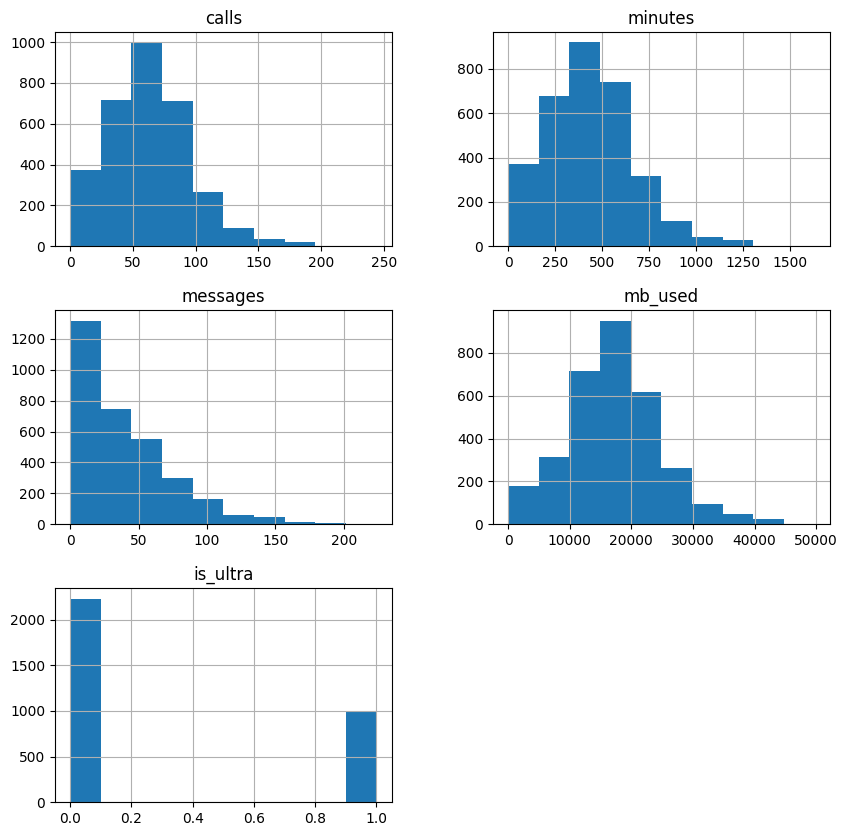

In [5]:
df.hist(figsize=(10, 10));

Итоги предыдущего проекта по предварительному анализу поведения клиентов компании "Мегалайн":
* были исследованы данные пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год
* была проведена предобработка данных, в ходе которой данные проверили на наличие пропусков, дубликатов и аномалий, а также устранили их при необходимости
* на основе предоставленных данных были подсчитаны количество сделанных звонков, количество израсходованных минут разговора, количество отправленных сообщений, количество потраченных мегабайт. Эти показатели были объеденены в одну таблицу
* проведен сравнительный анализ пользователей тарифов "Ультра" и "Смарт". Предложенные тарифы сильно отличаются друг от друга. Тариф "Ультра" проявляет нелинейную положительную динамику по количеству сообщений и длительности разговора. Также было замечено, что абоненты тарифа "Смарт" чаще чем абоненты "Ультра" перерасходуют лимиты, что говорит о том, что первый тариф не соответвует большинству пользователей

Предстоит выполнить задачу бинарной классификации, чтобы построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра». Целевой признак - "is_ultra". 

## Выборки

In [6]:
target = df['is_ultra']

#  разделим данные на обучающую и валидационную выборки
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345, stratify=target)

# создадим переменные для признаков
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

# из валидационной выделим тестовую выборку
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=12345, stratify=target_valid)

features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']

In [7]:
print('Размер тренировочной выборки:', df_train.shape)
print('Размер валидационной выборки:', df_valid.shape)
print('Размер тестовой выборки:', df_test.shape)

Размер тренировочной выборки: (1928, 5)
Размер валидационной выборки: (643, 5)
Размер тестовой выборки: (643, 5)


## Обучение

### Решающее дерево

In [8]:
for depth in range(1, 7):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_valid = model_tree.predict(features_valid) 
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7348367029548989
max_depth = 2 : 0.7706065318818041
max_depth = 3 : 0.7884914463452566
max_depth = 4 : 0.7643856920684292
max_depth = 5 : 0.7986003110419907
max_depth = 6 : 0.7869362363919129


In [9]:
# изменение нескольких гиперпараметров
for depth in range(1, 7):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, criterion="entropy")
    model_tree.fit(features_train, target_train)
    predictions_valid = model_tree.predict(features_valid) 
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7348367029548989
max_depth = 2 : 0.7706065318818041
max_depth = 3 : 0.7884914463452566
max_depth = 4 : 0.7659409020217729
max_depth = 5 : 0.7954898911353032
max_depth = 6 : 0.7892690513219285


In [10]:
for depth in range(1, 7):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, splitter='random')
    model_tree.fit(features_train, target_train)
    predictions_valid = model_tree.predict(features_valid) 
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.6936236391912908
max_depth = 2 : 0.713841368584759
max_depth = 3 : 0.7255054432348367
max_depth = 4 : 0.76049766718507
max_depth = 5 : 0.7744945567651633
max_depth = 6 : 0.7884914463452566


### Случайный лес

In [11]:
best_model_forest = None
best_result_forest = 0
for est in range(1, 11):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_forest.fit(features_train, target_train)
    predictions_valid = model_forest.predict(features_valid) 
    result_forest = accuracy_score(target_valid, predictions_valid)
    if result_forest > best_result_forest:
        best_model_forest = model_forest
        best_result_forest = result_forest

print("Accuracy наилучшей модели на валидационной выборке:", best_result_forest)

Accuracy наилучшей модели на валидационной выборке: 0.7900466562986003


### Логистическая регрессия

In [12]:
# логистическая регрессия
model_reg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_reg.fit(features_train, target_train)
predictions_valid = model_reg.predict(features_valid)
result_reg = accuracy_score(target_valid, predictions_valid)

print("Accuracy модели на валидационной выборке:", result_reg)

Accuracy модели на валидационной выборке: 0.7426127527216174


**Выводы:** Согласно условию, необходимо, чтобы качество модели было больше 0.75. С этой задачей справились две модели: решающее дерево и случайный лес. При изменении гипперпараметров в обеих выборках дает приблизительно похожий результат в 0.78 доли правильных ответов. Лучшее качество у модели случайный лес, так как с увеличением количества деревьев улучшается результат.

## Проверка модели

In [13]:
# проверка на тестовой выборке
predictions_test = model_forest.predict(features_test)
result_test = accuracy_score(target_test, predictions_test)

print("Accuracy модели на тестовой выборке:", result_test)

Accuracy модели на тестовой выборке: 0.7931570762052877


**Вывод:** Качество предсказаний на тренировочной выборке совпадает с качеством на тестовой выборке

## Общий вывод

В ходе исследования было выполнено:
* Изучены исходные данные
* Данные разбиты на три выборки - обучающую, валидационную и тестовую - в соотношении 3/1/1
* Исследованы модели - решающее дерево, случайный лес и логическая регрессия.
* Рассмотрены и выбраны оптимальные параметры
* Выбрана лучшая модель - случайный лес
* Качество модели сравнили с тестовой выборкой - качество на валидационной выборке совпало со значением на тестовой
* Качество лучшей модели составляет 0,79 , что удовлетворяет условию задачи.
